In [1]:
from __future__ import print_function

import logging
import sys
root_logger = logging.getLogger()
stdout_handler = logging.StreamHandler(sys.stdout)
root_logger.addHandler(stdout_handler)
root_logger.setLevel(logging.DEBUG)

import mxnet as mx
from mxnet import nd, autograd, sym, mod
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from src.fetch_mnist import preprocessed_mnist

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = preprocessed_mnist(random_state=0)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5) 
category_count = len(np.unique(y_train))

def data_iter(X, y, batch_size=10000):
  batch_size = min(X.shape[0], batch_size)
  return mx.io.NDArrayIter(
    data=nd.array(X),
    label=nd.array(X),
    batch_size=batch_size,
    label_name='data')

train_iter = data_iter(X_train, y_train)
valid_iter = data_iter(X_valid, y_valid)
test_iter = data_iter(X_test, y_test)

/opt/anaconda3/envs/nnets/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


### We'll write autoencoders in MXNet.

Let's start with simple autoencoder - no regularization or fancy optimization techniques.

In [3]:
input_size = 784
hidden_size = 128 

In [4]:
def autoencoder_loss():
  data = sym.Variable('data')
  weights = sym.Variable(name='weighs', shape=(input_size, hidden_size), init=mx.init.Xavier())
  hid_in = sym.dot(data, weights, name='hidden_in')
  codes = sym.Activation(hid_in, act_type='relu', name='codes')
  hid_out = sym.dot(codes, weights.transpose(), name='hidden_out')
  return mx.symbol.MakeLoss(
    mx.symbol.LinearRegressionOutput(data=hid_out, label=data)
  )

autoencoder = mod.Module(symbol=autoencoder_loss(), label_names=['data'])

In [5]:
%time autoencoder.fit(train_iter, eval_data=valid_iter, num_epoch=200, eval_metric='rmse', optimizer_params={'learning_rate': 0.5})

Epoch[0] Train-rmse=0.941132
Epoch[0] Time cost=1.231
Epoch[0] Validation-rmse=1.298333
Epoch[1] Train-rmse=0.931633
Epoch[1] Time cost=1.138
Epoch[1] Validation-rmse=1.287177
Epoch[2] Train-rmse=0.924094
Epoch[2] Time cost=1.135
Epoch[2] Validation-rmse=1.278318
Epoch[3] Train-rmse=0.917874
Epoch[3] Time cost=1.244
Epoch[3] Validation-rmse=1.271124
Epoch[4] Train-rmse=0.912575
Epoch[4] Time cost=1.264
Epoch[4] Validation-rmse=1.265168
Epoch[5] Train-rmse=0.907937
Epoch[5] Time cost=1.231
Epoch[5] Validation-rmse=1.260150
Epoch[6] Train-rmse=0.903780
Epoch[6] Time cost=1.243
Epoch[6] Validation-rmse=1.255850
Epoch[7] Train-rmse=0.899978
Epoch[7] Time cost=1.855
Epoch[7] Validation-rmse=1.252107
Epoch[8] Train-rmse=0.896441
Epoch[8] Time cost=1.613
Epoch[8] Validation-rmse=1.248795
Epoch[9] Train-rmse=0.893105
Epoch[9] Time cost=1.860
Epoch[9] Validation-rmse=1.245818
Epoch[10] Train-rmse=0.889921
Epoch[10] Time cost=1.354
Epoch[10] Validation-rmse=1.243101
Epoch[11] Train-rmse=0.886853

Epoch[90] Validation-rmse=1.140860
Epoch[91] Train-rmse=0.741138
Epoch[91] Time cost=1.348
Epoch[91] Validation-rmse=1.140219
Epoch[92] Train-rmse=0.740156
Epoch[92] Time cost=1.372
Epoch[92] Validation-rmse=1.139583
Epoch[93] Train-rmse=0.739182
Epoch[93] Time cost=1.413
Epoch[93] Validation-rmse=1.138953
Epoch[94] Train-rmse=0.738216
Epoch[94] Time cost=1.346
Epoch[94] Validation-rmse=1.138328
Epoch[95] Train-rmse=0.737257
Epoch[95] Time cost=1.281
Epoch[95] Validation-rmse=1.137708
Epoch[96] Train-rmse=0.736306
Epoch[96] Time cost=1.281
Epoch[96] Validation-rmse=1.137094
Epoch[97] Train-rmse=0.735363
Epoch[97] Time cost=1.336
Epoch[97] Validation-rmse=1.136484
Epoch[98] Train-rmse=0.734427
Epoch[98] Time cost=1.297
Epoch[98] Validation-rmse=1.135880
Epoch[99] Train-rmse=0.733498
Epoch[99] Time cost=1.266
Epoch[99] Validation-rmse=1.135280
Epoch[100] Train-rmse=0.732577
Epoch[100] Time cost=1.283
Epoch[100] Validation-rmse=1.134686
Epoch[101] Train-rmse=0.731662
Epoch[101] Time cost=

Epoch[178] Time cost=1.144
Epoch[178] Validation-rmse=1.099298
Epoch[179] Train-rmse=0.677107
Epoch[179] Time cost=1.141
Epoch[179] Validation-rmse=1.098951
Epoch[180] Train-rmse=0.676572
Epoch[180] Time cost=1.150
Epoch[180] Validation-rmse=1.098605
Epoch[181] Train-rmse=0.676039
Epoch[181] Time cost=1.145
Epoch[181] Validation-rmse=1.098261
Epoch[182] Train-rmse=0.675510
Epoch[182] Time cost=1.144
Epoch[182] Validation-rmse=1.097919
Epoch[183] Train-rmse=0.674984
Epoch[183] Time cost=1.144
Epoch[183] Validation-rmse=1.097579
Epoch[184] Train-rmse=0.674460
Epoch[184] Time cost=1.211
Epoch[184] Validation-rmse=1.097239
Epoch[185] Train-rmse=0.673940
Epoch[185] Time cost=1.154
Epoch[185] Validation-rmse=1.096901
Epoch[186] Train-rmse=0.673423
Epoch[186] Time cost=1.171
Epoch[186] Validation-rmse=1.096565
Epoch[187] Train-rmse=0.672909
Epoch[187] Time cost=1.153
Epoch[187] Validation-rmse=1.096230
Epoch[188] Train-rmse=0.672398
Epoch[188] Time cost=1.142
Epoch[188] Validation-rmse=1.0958

In [6]:
reconstructed_digits = autoencoder.predict(valid_iter)
autoencoder.score(test_iter, eval_metric='rmse')

[('rmse', 0.78088837862014771)]

In [7]:
def plot_two_img_rows(X1, X2, title, j=5):
  f, axes = plt.subplots(2, j, figsize=(20, 40 / j))
  f.suptitle(title)
  for k, x in zip(range(2), [X1, X2]):
    for i in range(j):
      ax = axes[k, i]
      img = x[i, :].reshape(28, 28)
      ax.imshow(img, cmap='gray')
      ax.axis('off')
  plt.show()

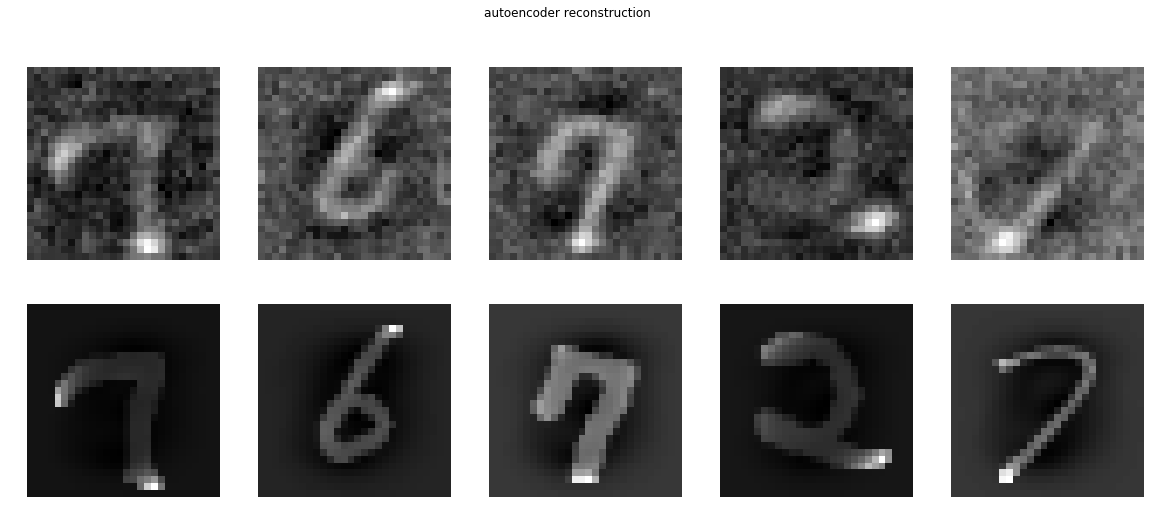

In [8]:
reconstructed_digit_examples = reconstructed_digits[:10, :].asnumpy()

plot_two_img_rows(reconstructed_digit_examples[:10], X_valid[:10], 'autoencoder reconstruction')

### Adding dropout 

In [9]:
def dropout_autoencoder_loss(p):
  data = sym.Variable('data')
  weights = sym.Dropout(
    p=p, 
    data=sym.Variable(
       name='weighs',
       shape=(input_size, hidden_size),
       init=mx.init.Xavier(),
       dtype='float32')
  )
  hid_in = sym.dot(data, weights, name='hidden_in')
  codes = sym.Activation(hid_in, act_type='relu', name='codes')
  hid_out = sym.dot(codes, weights.transpose(), name='hidden_out')
  return mx.symbol.MakeLoss(
    mx.symbol.LinearRegressionOutput(data=hid_out, label=data)
  )

dropout_autoencoder = mod.Module(symbol=dropout_autoencoder_loss(p=0.33), label_names=['data'])

In [10]:
%time dropout_autoencoder.fit(train_iter, eval_data=valid_iter, num_epoch=200, eval_metric='rmse', optimizer_params={'learning_rate': 0.5})

Epoch[0] Train-rmse=1.019462
Epoch[0] Time cost=1.163
Epoch[0] Validation-rmse=1.288787
Epoch[1] Train-rmse=0.997774
Epoch[1] Time cost=1.113
Epoch[1] Validation-rmse=1.274834
Epoch[2] Train-rmse=0.984026
Epoch[2] Time cost=1.108
Epoch[2] Validation-rmse=1.265972
Epoch[3] Train-rmse=0.974810
Epoch[3] Time cost=1.100
Epoch[3] Validation-rmse=1.260475
Epoch[4] Train-rmse=0.967690
Epoch[4] Time cost=1.247
Epoch[4] Validation-rmse=1.256417
Epoch[5] Train-rmse=0.960047
Epoch[5] Time cost=1.111
Epoch[5] Validation-rmse=1.253548
Epoch[6] Train-rmse=0.956516
Epoch[6] Time cost=1.124
Epoch[6] Validation-rmse=1.251248
Epoch[7] Train-rmse=0.953776
Epoch[7] Time cost=1.127
Epoch[7] Validation-rmse=1.249791
Epoch[8] Train-rmse=0.950073
Epoch[8] Time cost=1.116
Epoch[8] Validation-rmse=1.248681
Epoch[9] Train-rmse=0.948672
Epoch[9] Time cost=1.122
Epoch[9] Validation-rmse=1.247461
Epoch[10] Train-rmse=0.946047
Epoch[10] Time cost=1.114
Epoch[10] Validation-rmse=1.246389
Epoch[11] Train-rmse=0.943862

Epoch[90] Validation-rmse=1.186091
Epoch[91] Train-rmse=0.849254
Epoch[91] Time cost=1.098
Epoch[91] Validation-rmse=1.185540
Epoch[92] Train-rmse=0.848918
Epoch[92] Time cost=1.103
Epoch[92] Validation-rmse=1.185122
Epoch[93] Train-rmse=0.847834
Epoch[93] Time cost=1.101
Epoch[93] Validation-rmse=1.184101
Epoch[94] Train-rmse=0.847167
Epoch[94] Time cost=1.108
Epoch[94] Validation-rmse=1.183898
Epoch[95] Train-rmse=0.845562
Epoch[95] Time cost=1.103
Epoch[95] Validation-rmse=1.183112
Epoch[96] Train-rmse=0.844328
Epoch[96] Time cost=1.118
Epoch[96] Validation-rmse=1.182493
Epoch[97] Train-rmse=0.844358
Epoch[97] Time cost=1.148
Epoch[97] Validation-rmse=1.182570
Epoch[98] Train-rmse=0.842025
Epoch[98] Time cost=1.150
Epoch[98] Validation-rmse=1.181890
Epoch[99] Train-rmse=0.841671
Epoch[99] Time cost=1.100
Epoch[99] Validation-rmse=1.181352
Epoch[100] Train-rmse=0.840217
Epoch[100] Time cost=1.110
Epoch[100] Validation-rmse=1.181105
Epoch[101] Train-rmse=0.839598
Epoch[101] Time cost=

Epoch[178] Time cost=1.584
Epoch[178] Validation-rmse=1.146657
Epoch[179] Train-rmse=0.781923
Epoch[179] Time cost=1.386
Epoch[179] Validation-rmse=1.146091
Epoch[180] Train-rmse=0.780757
Epoch[180] Time cost=1.646
Epoch[180] Validation-rmse=1.145862
Epoch[181] Train-rmse=0.779626
Epoch[181] Time cost=1.686
Epoch[181] Validation-rmse=1.145611
Epoch[182] Train-rmse=0.779712
Epoch[182] Time cost=1.824
Epoch[182] Validation-rmse=1.145483
Epoch[183] Train-rmse=0.778339
Epoch[183] Time cost=1.720
Epoch[183] Validation-rmse=1.145337
Epoch[184] Train-rmse=0.778295
Epoch[184] Time cost=2.002
Epoch[184] Validation-rmse=1.144720
Epoch[185] Train-rmse=0.776484
Epoch[185] Time cost=1.913
Epoch[185] Validation-rmse=1.144541
Epoch[186] Train-rmse=0.776935
Epoch[186] Time cost=2.307
Epoch[186] Validation-rmse=1.144369
Epoch[187] Train-rmse=0.775912
Epoch[187] Time cost=2.003
Epoch[187] Validation-rmse=1.143838
Epoch[188] Train-rmse=0.776782
Epoch[188] Time cost=1.804
Epoch[188] Validation-rmse=1.1433

In [11]:
dropout_reconstructed_digits = dropout_autoencoder.predict(valid_iter)
dropout_autoencoder.score(test_iter, eval_metric='rmse')

[('rmse', 0.83208459615707397)]

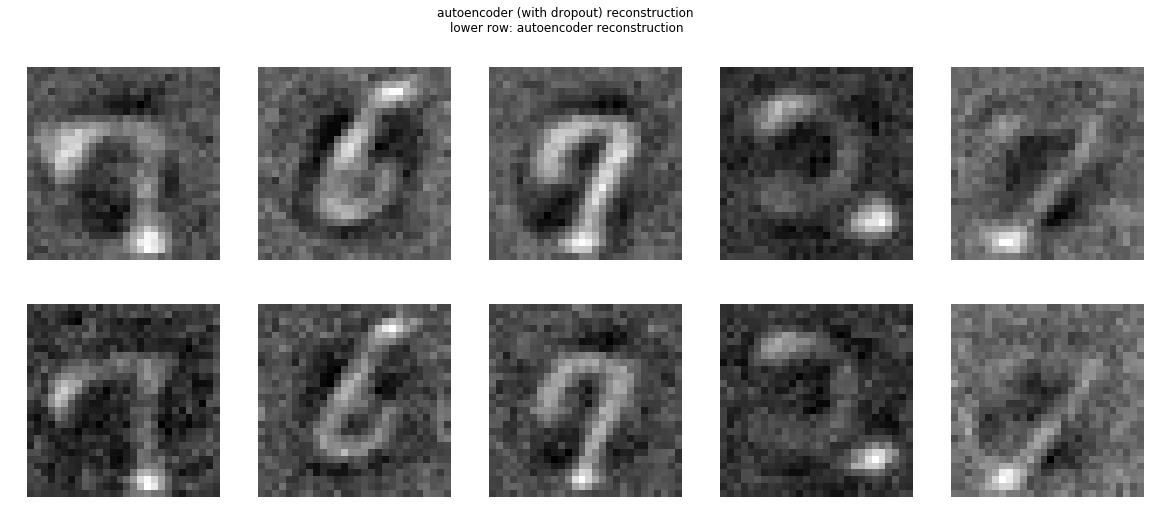

In [12]:
dropout_reconstructed_digit_examples = dropout_reconstructed_digits[:10, :].asnumpy()

plot_two_img_rows(dropout_reconstructed_digit_examples[:10], reconstructed_digit_examples[:10], 'autoencoder (with dropout) reconstruction \nlower row: autoencoder reconstruction')

### Denoising autoencoder (with continuous, normally distributed noise)

In [13]:
def denoising_autoencoder_loss(sigma):
  data = sym.Variable('data')
  noise = sym.Variable('noise', init=mx.init.Normal(sigma), shape=(input_size,), )
  noisy_data = sym.broadcast_plus(data, noise)
  weights = sym.Variable(
       name='weighs',
       shape=(input_size, hidden_size),
       init=mx.init.Xavier(),
       dtype='float32')
  hid_in = sym.dot(noisy_data, weights, name='hidden_in')
  codes = sym.Activation(hid_in, act_type='relu', name='codes')
  hid_out = sym.dot(codes, weights.transpose(), name='hidden_out')
  return mx.symbol.MakeLoss(
    mx.symbol.LinearRegressionOutput(data=hid_out, label=data)
  )

denoising_autoencoder = mod.Module(
  symbol=denoising_autoencoder_loss(sigma=0.05),
  label_names=['data'],
  fixed_param_names=['noise'])

In [14]:
%time denoising_autoencoder.fit(train_iter, eval_data=valid_iter, num_epoch=200, eval_metric='rmse', optimizer_params={'learning_rate': 0.5}, force_init=True, force_rebind=True)

Epoch[0] Train-rmse=0.939501
Epoch[0] Time cost=1.899
Epoch[0] Validation-rmse=1.295171
Epoch[1] Train-rmse=0.930325
Epoch[1] Time cost=1.783
Epoch[1] Validation-rmse=1.284340
Epoch[2] Train-rmse=0.922973
Epoch[2] Time cost=1.854
Epoch[2] Validation-rmse=1.275617
Epoch[3] Train-rmse=0.916847
Epoch[3] Time cost=1.592
Epoch[3] Validation-rmse=1.268441
Epoch[4] Train-rmse=0.911573
Epoch[4] Time cost=1.590
Epoch[4] Validation-rmse=1.262433
Epoch[5] Train-rmse=0.906905
Epoch[5] Time cost=1.729
Epoch[5] Validation-rmse=1.257324
Epoch[6] Train-rmse=0.902680
Epoch[6] Time cost=1.896
Epoch[6] Validation-rmse=1.252920
Epoch[7] Train-rmse=0.898787
Epoch[7] Time cost=2.075
Epoch[7] Validation-rmse=1.249072
Epoch[8] Train-rmse=0.895149
Epoch[8] Time cost=1.992
Epoch[8] Validation-rmse=1.245669
Epoch[9] Train-rmse=0.891712
Epoch[9] Time cost=1.714
Epoch[9] Validation-rmse=1.242619
Epoch[10] Train-rmse=0.888437
Epoch[10] Time cost=1.687
Epoch[10] Validation-rmse=1.239848
Epoch[11] Train-rmse=0.885293

Epoch[90] Validation-rmse=1.138080
Epoch[91] Train-rmse=0.740213
Epoch[91] Time cost=2.960
Epoch[91] Validation-rmse=1.137432
Epoch[92] Train-rmse=0.739218
Epoch[92] Time cost=2.445
Epoch[92] Validation-rmse=1.136790
Epoch[93] Train-rmse=0.738233
Epoch[93] Time cost=1.677
Epoch[93] Validation-rmse=1.136153
Epoch[94] Train-rmse=0.737257
Epoch[94] Time cost=1.671
Epoch[94] Validation-rmse=1.135523
Epoch[95] Train-rmse=0.736290
Epoch[95] Time cost=1.686
Epoch[95] Validation-rmse=1.134898
Epoch[96] Train-rmse=0.735331
Epoch[96] Time cost=1.733
Epoch[96] Validation-rmse=1.134280
Epoch[97] Train-rmse=0.734382
Epoch[97] Time cost=1.943
Epoch[97] Validation-rmse=1.133668
Epoch[98] Train-rmse=0.733440
Epoch[98] Time cost=1.822
Epoch[98] Validation-rmse=1.133062
Epoch[99] Train-rmse=0.732508
Epoch[99] Time cost=2.217
Epoch[99] Validation-rmse=1.132460
Epoch[100] Train-rmse=0.731583
Epoch[100] Time cost=1.861
Epoch[100] Validation-rmse=1.131861
Epoch[101] Train-rmse=0.730666
Epoch[101] Time cost=

Epoch[178] Time cost=1.222
Epoch[178] Validation-rmse=1.096207
Epoch[179] Train-rmse=0.676652
Epoch[179] Time cost=1.217
Epoch[179] Validation-rmse=1.095842
Epoch[180] Train-rmse=0.676120
Epoch[180] Time cost=1.227
Epoch[180] Validation-rmse=1.095478
Epoch[181] Train-rmse=0.675590
Epoch[181] Time cost=1.218
Epoch[181] Validation-rmse=1.095117
Epoch[182] Train-rmse=0.675063
Epoch[182] Time cost=1.239
Epoch[182] Validation-rmse=1.094756
Epoch[183] Train-rmse=0.674539
Epoch[183] Time cost=1.221
Epoch[183] Validation-rmse=1.094397
Epoch[184] Train-rmse=0.674018
Epoch[184] Time cost=1.225
Epoch[184] Validation-rmse=1.094040
Epoch[185] Train-rmse=0.673499
Epoch[185] Time cost=1.226
Epoch[185] Validation-rmse=1.093684
Epoch[186] Train-rmse=0.672984
Epoch[186] Time cost=1.217
Epoch[186] Validation-rmse=1.093330
Epoch[187] Train-rmse=0.672471
Epoch[187] Time cost=1.248
Epoch[187] Validation-rmse=1.092977
Epoch[188] Train-rmse=0.671961
Epoch[188] Time cost=1.223
Epoch[188] Validation-rmse=1.0926

In [15]:
denoising_reconstructed_digits = denoising_autoencoder.predict(valid_iter)
denoising_autoencoder.score(test_iter, eval_metric='rmse')

[('rmse', 0.78513509035110474)]

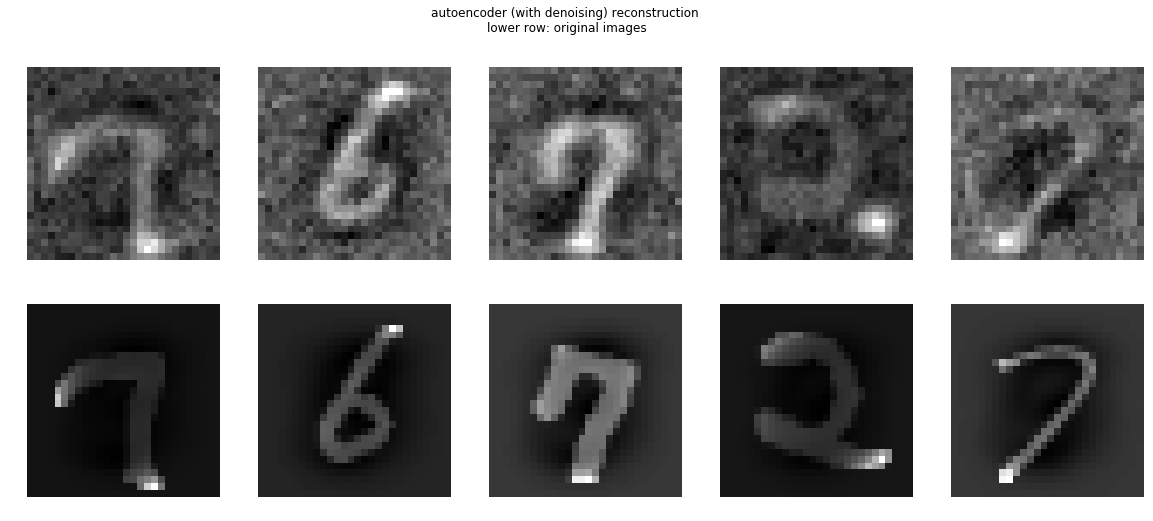

In [16]:
denoising_reconstructed_digit_examples = denoising_reconstructed_digits[:10, :].asnumpy()

plot_two_img_rows(denoising_reconstructed_digit_examples[:10], X_valid[:10], 'autoencoder (with denoising) reconstruction \nlower row: original images')